# Extra Credit: Expectation Maximization Demo for 2 Component GMM

This is an OPTIONAL extra credit assignment worth 10 points. Any points earned on this assignment will be applied to one of your exam grades, excluding the final exam (Exam 1 and Exam 2 only).

Assignment

Recreate the demo video showed in class on 4/17, or show iterated frames from the simulation. The video is also in the slides from class as well as posted under the respective module on the Modules page.

Generate synthetic data drawn from 2 independent Gaussian distributions with non-circular covariance matrices and means at least 5 units apart (for easy convergence).
Apply the EM algorithm to fit a 2-component GMM to the data.
Record the iterations either in a video or in successive plots showing the data and the contour plots of the individual Gaussian models at each iteration.
Also show the "ground-truth" means and covariances you defined in step 1, as well as the estimates the EM algorithm converged to. A table might be the best way to show this.
Your deliverables are:

Either a video or a series of plots showing successive iterations of the algorithm.
A comparison of the ground-truth means/covariances and the estimated means/covariances.
Your code.
You may not use built in GMM or EM functions for this assignment.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import scipy.stats as ss

#### Given parameters
mean1 = np.array([5,4])
mean2 = np.array([-4,-2])
cov1  = np.array([[2,1.2],[1.2,2]])
cov2  = np.array([[2,-1],[-1,2]])

# Generating Training and Testing Data
# Creating a class for the dataset
class Data_set:
    def __init__(self, mean, cov):
        self.mean = mean
        self.cov  = cov
    
    def split_data(self):
        np.random.shuffle(self.data)
        self.train = self.data[:len(self.data)//2]
        self.test  = self.data[len(self.data)//2:]
        
        return self
    
    def multivariate_normal(self, num):
        # asself.data.shape = num *  2
        self.data = np.random.multivariate_normal(self.mean,self.cov,size=num)
    
        return self


In [2]:
# Generating Data sets
c1 = Data_set(mean1, cov1)
c2 = Data_set(mean2, cov2)

c1.multivariate_normal(200)
c2.multivariate_normal(200)

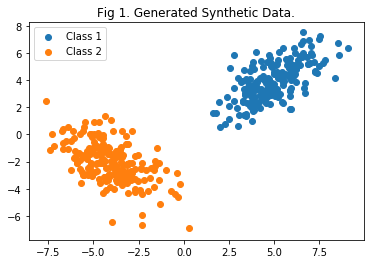

In [3]:
# Ploting synthetic data
f1 = plt.figure(1)
p1 = f1.add_subplot(111)
p1.scatter(c1.data[:,0],c1.data[:,1], label='Class 1')
p1.scatter(c2.data[:,0],c2.data[:,1], label='Class 2')
p1.legend()
p1.set_title("Fig 1. Generated Synthetic Data.")
plt.show()

In [4]:
all_data = np.vstack((c1.data, c2.data))
np.random.shuffle(all_data)
# plt.scatter(all_data[:,0], all_data[:,1])

In [9]:
# def my_multiply(a,b):
#     # a is an array
#     # b is a element
#     result = []
#     for item in a:
#         result.append(item*b)
    
#     return result

def EW_multiply(a,b):
    # they are both arrays
    # this function multply them one by one
    result = []
    for i in range(len(a)):
        result.append(a[i]*b[i])
        
    return result

def Expectation_Max(data):
    # Step 1: Initial Guess
    # - choose random values for means
    # - set covariance to overall covariance
    _mean1 = random.choice(data)
    _mean2 = random.choice(data)
    _cov1  = np.cov(data.T)
    _cov2  = np.cov(data.T)
    _pi    = 0.5
    
    print("Iteration | Pi")
    
    iterations = 0
    while(1):
        iterations = iterations+1
        # Expectation step, calculating responsibility
        _gamma = []
        _prev_pi = _pi

        
        # Calculating means
        for sample in data:
            _rv1  = ss.multivariate_normal(_mean1, _cov1)
            _rv2  = ss.multivariate_normal(_mean2, _cov2)
            num   = _pi * _rv2.pdf(sample)
            denom = (1 - _pi)*_rv1.pdf(sample) + _pi*_rv2.pdf(sample)
            _gamma.append(num/denom)
#         plt.clf()
#         plt.plot(_gamma)
        _gamma = np.array(_gamma)

        # Maximization step, calculating
        temp1 = EW_multiply((1-_gamma), data)
        temp2 = EW_multiply(_gamma, data)
        _mean1 = sum(temp1)/sum(1-_gamma)
        _mean2 = sum(temp2)/sum(_gamma)
        
        
        # Calculating _cov1        
        num = []
        denom = []
        for i in range(len(all_data)):
            num.append((1-_gamma[i])*((data[i][None]-_mean1).T.dot(data[i][None]-_mean1)))
            denom.append(1-_gamma[i])
        _cov1 = sum(num)/sum(denom)
        
        
        # Calculating _cov2
        num = []
        denom = []
        for i in range(len(all_data)):
            num.append(_gamma[i]*((data[i][None]-_mean2).T.dot(data[i][None]-_mean2)))
            denom.append(_gamma[i])
        _cov2 = sum(num)/sum(denom)
        
        _pi    = sum(_gamma)/len(_gamma)
        print(iterations,_pi)
        
        # Plotting
        plt.clf()
        
        rv1 = ss.multivariate_normal(_mean1, _cov1)
        rv2 = ss.multivariate_normal(_mean2, _cov2)

        x, y = np.mgrid[-8:10:.01, -8:10:.01]
        pos = np.dstack((x, y))
        f2 = plt.figure(2)
        p2 = f2.add_subplot(111)
        p2.scatter(c1.data[:,0],c1.data[:,1], label='Class 1')
        p2.scatter(c2.data[:,0],c2.data[:,1], label='Class 2')
        p2.contour(x,y,rv1.pdf(pos))
        p2.contour(x,y,rv2.pdf(pos))
        plt.pause(0.05)
        
        
        # converge condition
        if abs(_prev_pi-_pi)<0.00001:
            print("Converged!")
            return _mean1, _mean2, _cov1, _cov2, _pi

In [10]:
mean1, mean2, cov1, cov2

(array([5, 4]), array([-4, -2]), array([[2. , 1.2],
        [1.2, 2. ]]), array([[ 2, -1],
        [-1,  2]]))

Iteration | Pi
1 0.5627038136305361


<Figure size 432x288 with 0 Axes>

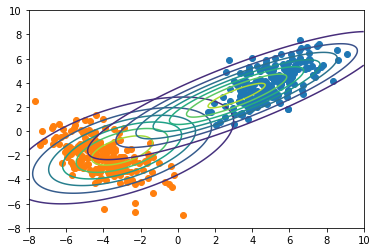

2 0.5550164048404276


<Figure size 432x288 with 0 Axes>

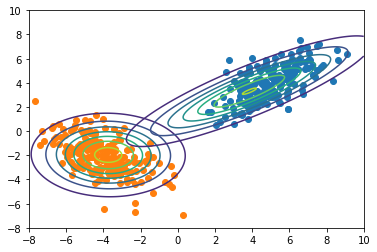

3 0.5199314195792062


<Figure size 432x288 with 0 Axes>

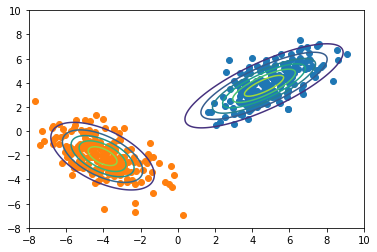

4 0.5013712822168638


<Figure size 432x288 with 0 Axes>

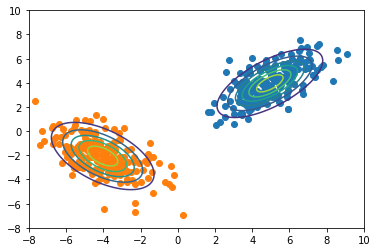

5 0.5000070368062124


<Figure size 432x288 with 0 Axes>

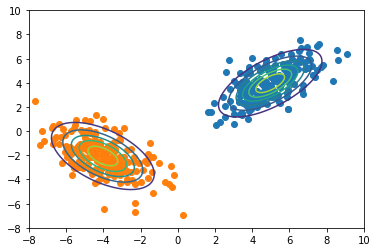

6 0.5000035041187288


<Figure size 432x288 with 0 Axes>

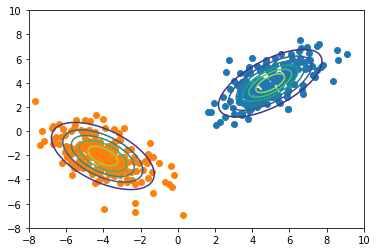

Converged!


In [11]:
[_mean1, _mean2, _cov1, _cov2, _pi] = Expectation_Max(all_data)

In [12]:
print("True Means are:", mean1, mean2)
print("Estimate Means are:", _mean1, _mean2)
print("\n")
print("True Covariances are:\n", cov1, "\n\n", cov2)
print("Estimate Covariances are:\n", _cov1, "\n\n", _cov2)

True Means are: [5 4] [-4 -2]
Estimate Means are: [-4.03031968 -2.0588895 ] [4.96437693 3.9651535 ]


True Covariances are:
 [[2.  1.2]
 [1.2 2. ]] 

 [[ 2 -1]
 [-1  2]]
Estimate Covariances are:
 [[ 2.16838263 -1.18480835]
 [-1.18480835  2.19269594]] 

 [[1.98819759 1.29722499]
 [1.29722499 2.01187409]]
